In [168]:
import warnings

import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

warnings.simplefilter('ignore')

# 

## Reading Dataset and transforming data to ease work with it

In [169]:
data = pd.read_csv("Sleep_Efficiency.csv")

data = data.drop(['ID', 'Bedtime', 'Wakeup time'], axis = 1)
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Smoking status'] = data['Smoking status'].map({'Yes': 1, 'No': 0})
data = data.astype('float64')

data.head(6)

,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65.0,0.0,6.0,0.88,18.0,70.0,12.0,0.0,0.0,0.0,1.0,3.0
1,69.0,1.0,7.0,0.66,19.0,28.0,53.0,3.0,0.0,3.0,1.0,3.0
2,40.0,0.0,8.0,0.89,20.0,70.0,10.0,1.0,0.0,0.0,0.0,3.0
3,40.0,0.0,6.0,0.51,23.0,25.0,52.0,3.0,50.0,5.0,1.0,1.0
4,57.0,1.0,8.0,0.76,27.0,55.0,18.0,3.0,0.0,3.0,0.0,3.0
5,36.0,0.0,7.5,0.90,23.0,60.0,17.0,0.0,NaN,0.0,0.0,1.0


## Checking dtypes of each column and then find unique features

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     452 non-null    float64
 1   Gender                  452 non-null    float64
 2   Sleep duration          452 non-null    float64
 3   Sleep efficiency        452 non-null    float64
 4   REM sleep percentage    452 non-null    float64
 5   Deep sleep percentage   452 non-null    float64
 6   Light sleep percentage  452 non-null    float64
 7   Awakenings              432 non-null    float64
 8   Caffeine consumption    427 non-null    float64
 9   Alcohol consumption     438 non-null    float64
 10  Smoking status          452 non-null    float64
 11  Exercise frequency      446 non-null    float64
dtypes: float64(12)
memory usage: 42.5 KB


In [171]:
data.nunique()

Age                       61
Gender                     2
Sleep duration             9
Sleep efficiency          50
REM sleep percentage      13
Deep sleep percentage     29
Light sleep percentage    29
Awakenings                 5
Caffeine consumption       6
Alcohol consumption        6
Smoking status             2
Exercise frequency         6
dtype: int64

#### 

## Build heatmap

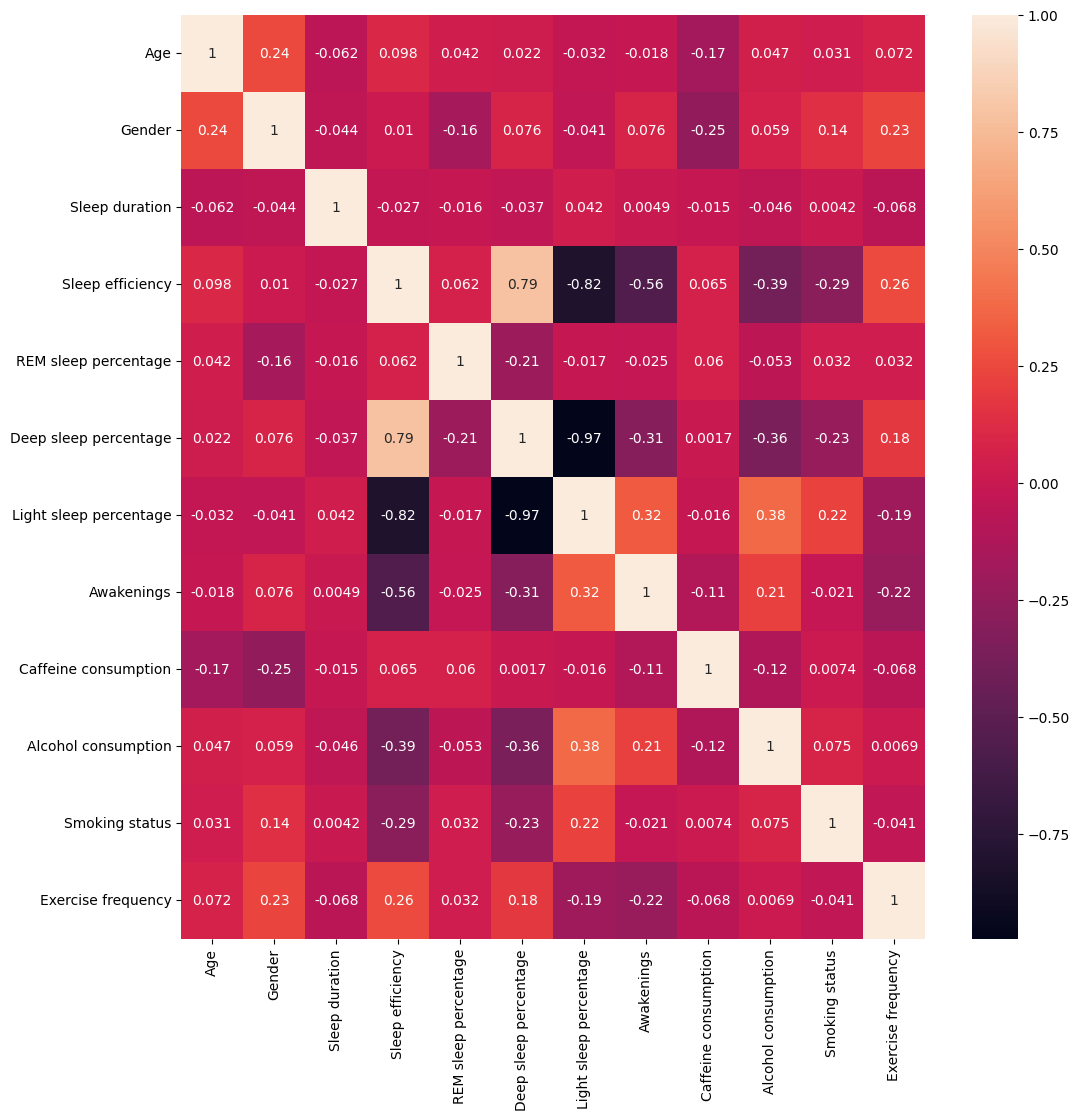

In [172]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot = True);

#### 

## Amount of male and female subjects of each age

0 stands for male subject, 1 stands for female subject

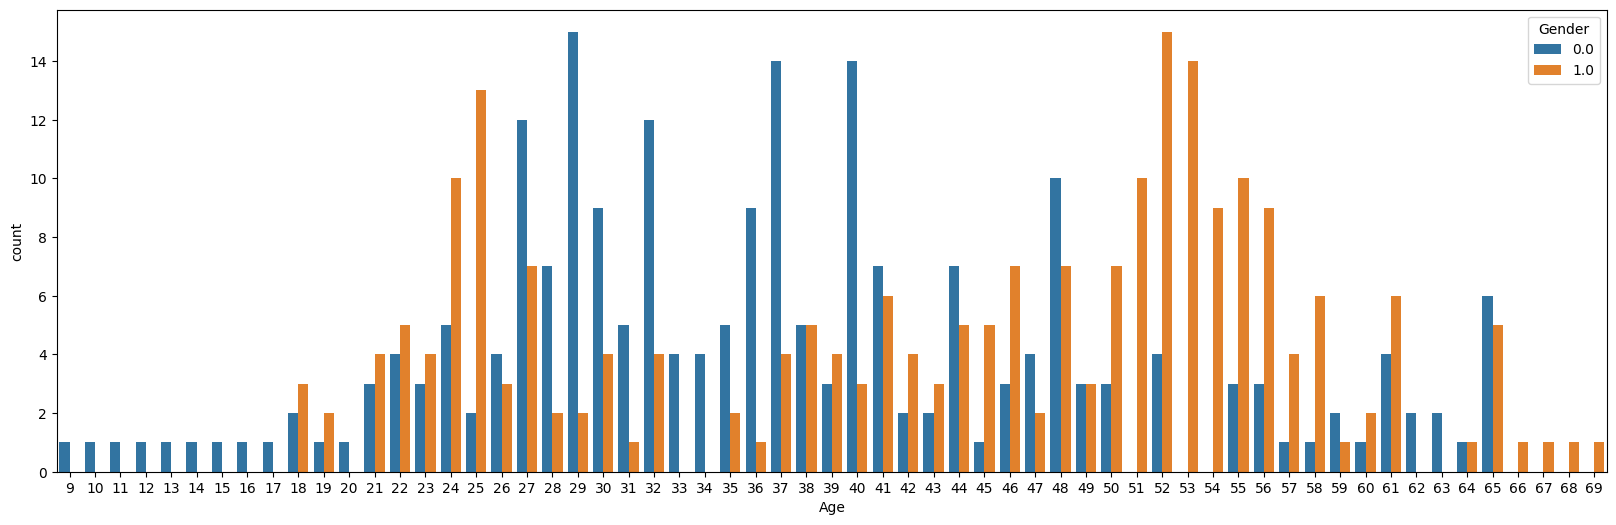

In [173]:
data.Age = data.Age.astype(int)

plt.figure(figsize=(20, 6))
sns.countplot(x='Age', hue='Gender', data=data);

#### 

## Build histograms for each feature

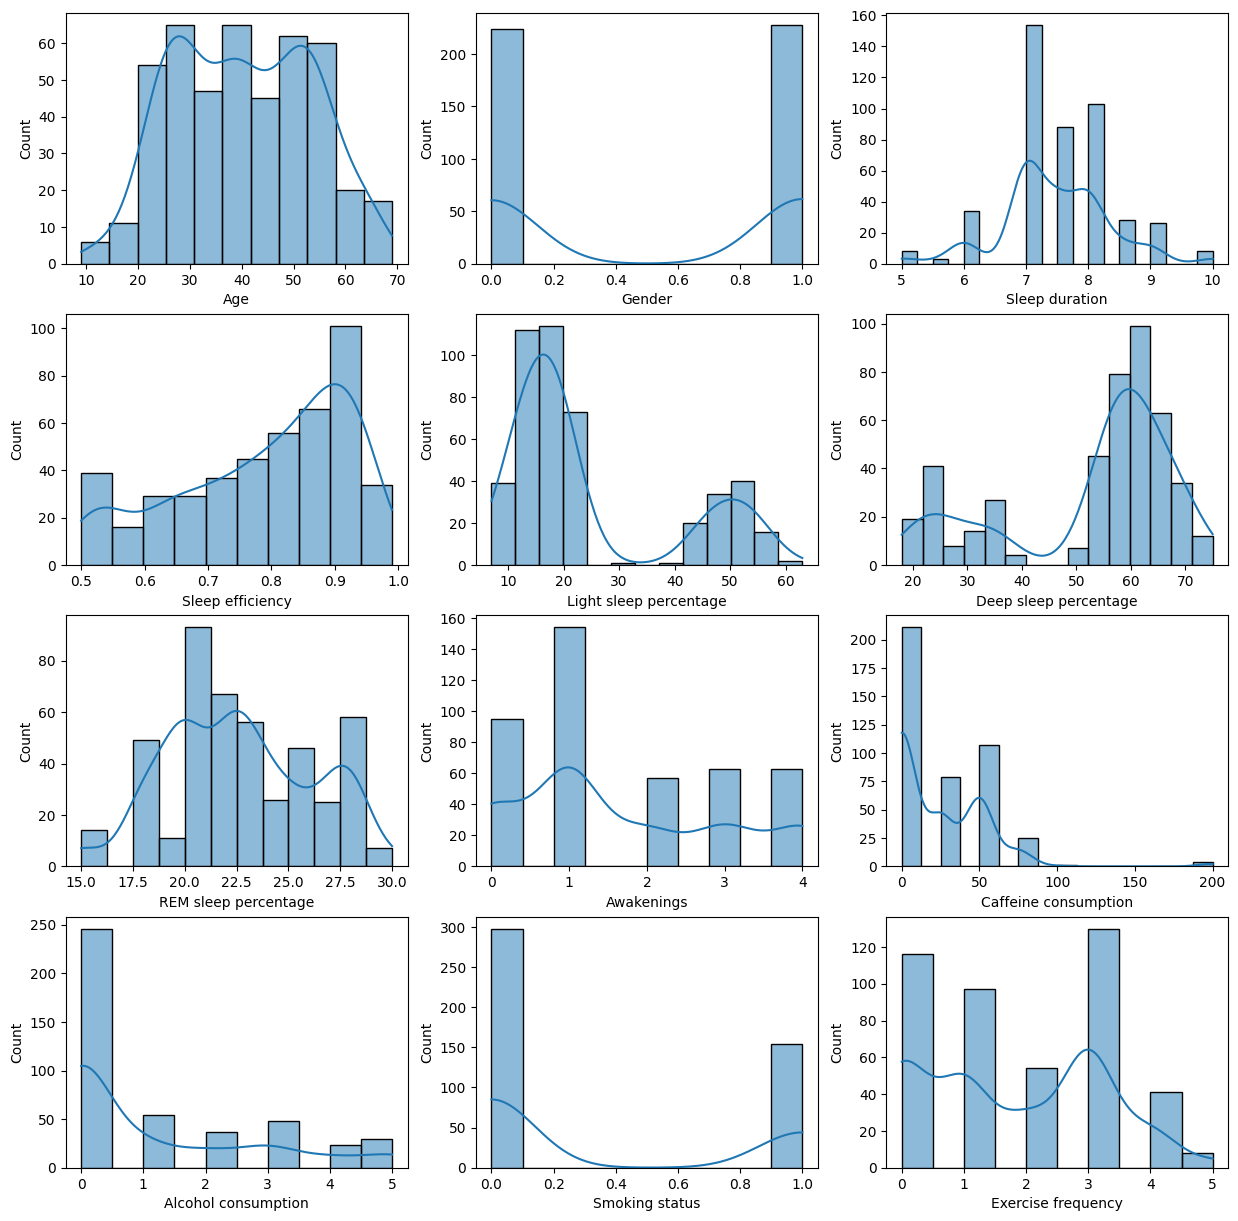

In [174]:
subplot_name = ['Age', 'Gender', 'Sleep duration', 'Sleep efficiency',
              'Light sleep percentage', 'Deep sleep percentage', 'REM sleep percentage', 'Awakenings',
              'Caffeine consumption', 'Alcohol consumption', 'Smoking status', 'Exercise frequency']

n = 1
indx = 0

plt.figure(figsize=(15, 15))

for i in range(12):
    plt.subplot(4, 3, n)
    sns.histplot(x=data[subplot_name[indx]], kde = True);
    
    n += 1
    indx += 1

In [175]:
data.describe()

,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,452.000000,446.000000
mean,40.285398,0.504425,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,0.340708,1.791480
std,13.172250,0.500534,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,0.474472,1.428134
min,9.000000,0.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,1.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,0.000000,2.000000
75%,52.000000,1.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,1.000000,3.000000
max,69.000000,1.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,1.000000,5.000000


### As we can see most of the subjects avoid smoking at all.
### Mean excersice frequency is about 1 time a week.
### 'Sleep efficiency' and 'Deep sleep percentage' are skewed to the left.

#  

## What does affect your sleep?

In [176]:
data['Sleep efficiency'].describe()

count    452.000000
mean       0.788916
std        0.135237
min        0.500000
25%        0.697500
50%        0.820000
75%        0.900000
max        0.990000
Name: Sleep efficiency, dtype: float64

### We can say that bad quality sleep (BQS) in the range of values [0; 25] percentile, good quality sleep (GQS) at [25; 75] percentile and perfect quality sleep (PQS) at [75; 100]

In [179]:
rq = np.array([])

def rateQuality(value):
    if value <= 0.697500:
        rq = np.append(rq, 'BQS')
    elif 0.697500 < value <= 0.900000:
        rq = np.append(rq, 'GQS')
    else:
        rq = np.append(rq, 'PQS')
    
for i in range(len(data)):
    rateQuality(data['Sleep efficiency'][i])
    
rq

UnboundLocalError: local variable 'rq' referenced before assignment

In [141]:
data.head(5)

,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,SE_rating
0,65,0.0,6.0,0.88,18.0,70.0,12.0,0.0,0.0,0.0,1.0,3.0,GQS
1,69,1.0,7.0,0.66,19.0,28.0,53.0,3.0,0.0,3.0,1.0,3.0,BQS
2,40,0.0,8.0,0.89,20.0,70.0,10.0,1.0,0.0,0.0,0.0,3.0,GQS
3,40,0.0,6.0,0.51,23.0,25.0,52.0,3.0,50.0,5.0,1.0,1.0,BQS
4,57,1.0,8.0,0.76,27.0,55.0,18.0,3.0,0.0,3.0,0.0,3.0,GQS
